# Seeing how parameters and scaling affect pacmap

In [1]:
import pandas as pd
import pacmap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
# PacMAP settings
n_neighbors = 20
init="pca"
prescale=False
apply_pca = False
MN_ratio = 2
reducer = pacmap.PaCMAP(n_neighbors=n_neighbors, apply_pca=apply_pca, MN_ratio=MN_ratio)
color_palette = sns.color_palette("Paired", 1000)

/users/mynttiam/.local/lib/python3.9/site-packages/pacmap/pacmap.py:847: UserWarning: Running ANNOY Indexing on high-dimensional data. Nearest-neighbor search may be slow!
  warnings.warn(


In [4]:
df = pd.read_json("mammoth_3d.json")

In [5]:
df

,0,1,2
0,430.826,106.864,24.492
1,397.734,99.293,14.370
2,480.505,80.876,131.561
3,422.736,87.715,13.504
4,414.840,113.363,78.061
...,...,...,...
9995,492.742,-114.477,107.954
9996,502.376,-94.579,117.065
9997,467.228,-168.295,97.806
9998,494.780,-111.272,115.444


In [6]:
df['combined']= df.values.tolist()

In [7]:
df

,0,1,2,combined
0,430.826,106.864,24.492,"[430.82599999999996, 106.86399999999999, 24.49..."
1,397.734,99.293,14.370,"[397.73400000000004, 99.29299999999999, 14.37]"
2,480.505,80.876,131.561,"[480.505, 80.876, 131.561]"
3,422.736,87.715,13.504,"[422.736, 87.715, 13.504000000000001]"
4,414.840,113.363,78.061,"[414.84, 113.363, 78.061]"
...,...,...,...,...
9995,492.742,-114.477,107.954,"[492.74199999999996, -114.477, 107.954]"
9996,502.376,-94.579,117.065,"[502.376, -94.579, 117.065]"
9997,467.228,-168.295,97.806,"[467.228, -168.295, 97.806]"
9998,494.780,-111.272,115.444,"[494.78, -111.272, 115.444]"


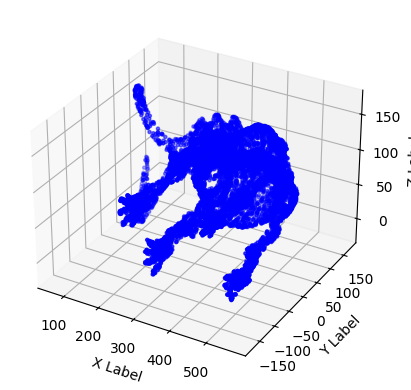

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[0],df[1],df[2], marker=".",color="b")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
plt.close()

In [9]:
column = "combined"
if prescale:
    scaled_embeddings = StandardScaler().fit_transform(df[column].tolist())
else:
    scaled_embeddings = df[column].tolist()
red_embedding = reducer.fit_transform(scaled_embeddings, init=init)
df["x_"+column] = red_embedding[:, 0]
df["y_"+column] = red_embedding[:, 1]

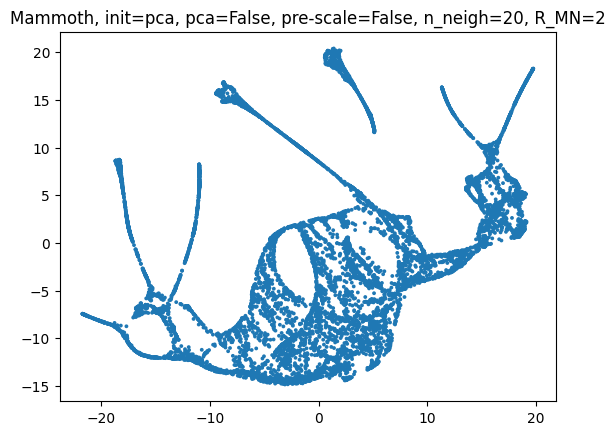

In [10]:
plt.figure()
plt.title(f'Mammoth, init={init}, pca={apply_pca}, pre-scale={prescale}, n_neigh={n_neighbors}, R_MN={MN_ratio}')
legend_elements = []

plt.scatter(
    df["x_"+column],
    df["y_"+column],
    s=30,
    marker=".",
    edgecolor="none",
    c=[color_palette[1]],
)
       
plt.show()

## RESULTS

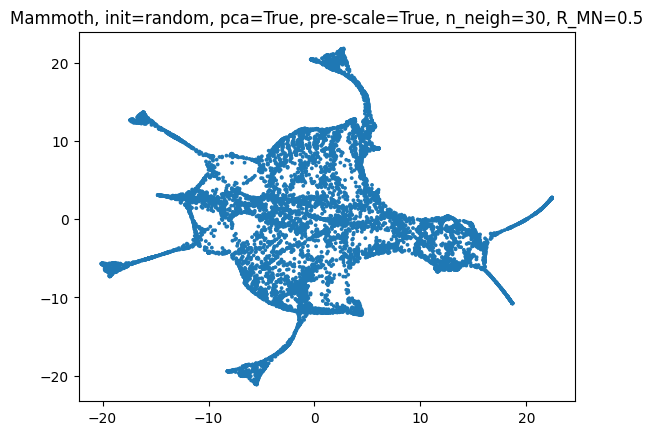

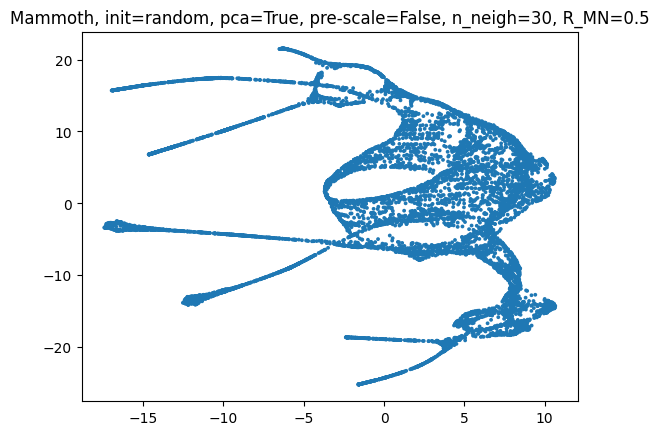

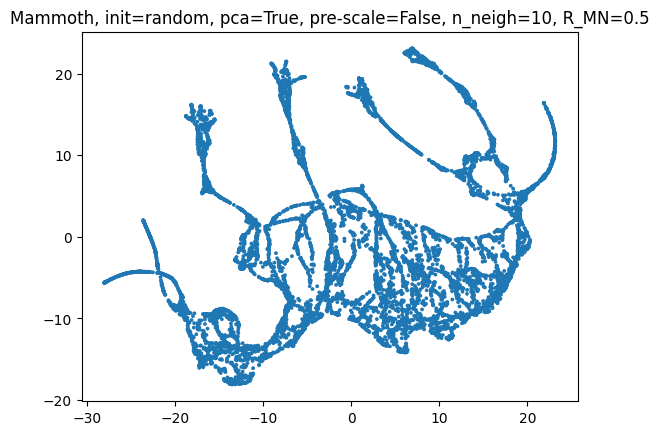

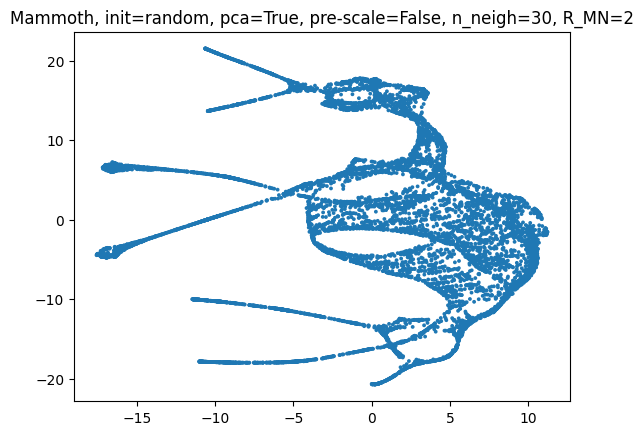

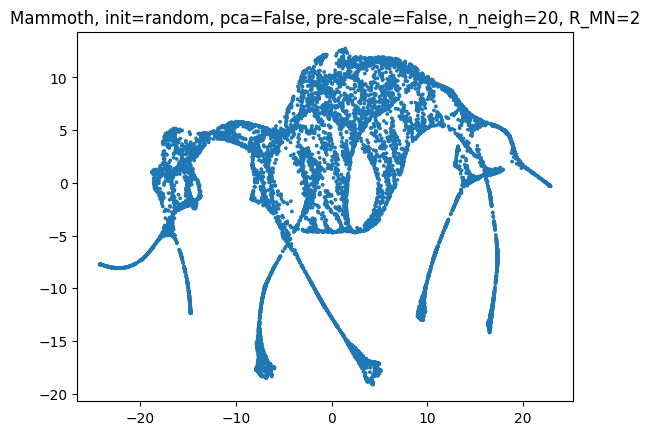

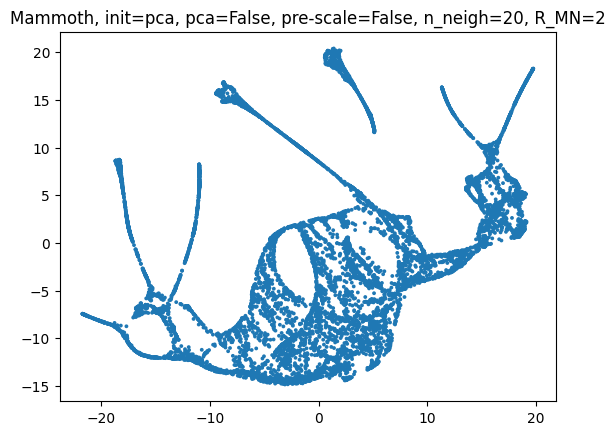